<a href="https://colab.research.google.com/github/rishabhdikhit/Aerofit---Descriptive-Statistics-Probability-./blob/main/aero_fit_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.


#Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\aerofit_treadmill.txt")

In [ ]:
df= data
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


No null values.

In [ ]:
data.shape

(180, 9)

In [ ]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


# Observations from Descriptive Statistics (Numerical)


1. Age: Median age of the customer(s) is 26 years, having maximum age of 50 years and minimum age of 18 years.
2. Education (Years): Median education years of the customer(s) is 16 years, with maximum education years is 21, and minimum years is 12.
3. Usage (Per week) : Median usage of treadmill is 3 times per week, with maximum 7 times per week and minimum 2 times per week.
4. Fitness (1-5) : Median fitness rating of customer(s) is 3 (moderately fit) and mean fitness roughly lies around the median.
5. Income ($): Median income of customer(s) is 50.5K annually. Maximum income is 104K annually, and minimum income is 29.5K.
6. Miles: Median distance travelled (walk/run) by customer(s) is 94. Maximum distance travelled is 114.75 and minimum is 21.









In [ ]:
print(data["Product"].nunique())
print(data["Product"].unique())
data["Product"].value_counts(normalize = True)

3
['KP281' 'KP481' 'KP781']


Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: proportion, dtype: float64

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]


<Axes: xlabel='age_group', ylabel='count'>

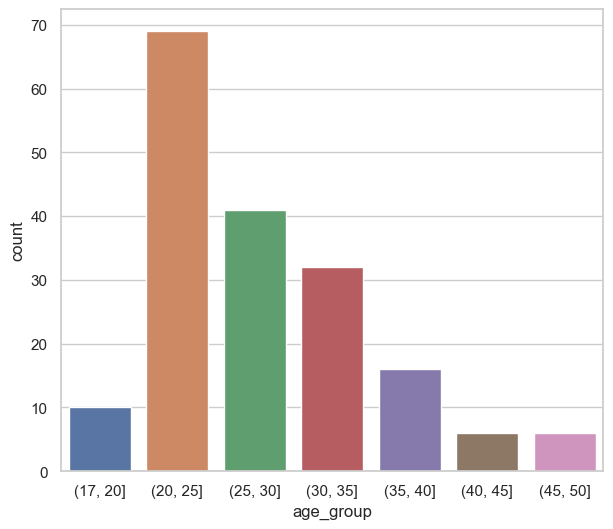

In [ ]:
print(data["Age"].unique())
vc = data["Age"].value_counts().reset_index()
vc_norm = data["Age"].value_counts(normalize = True).reset_index()

vc = vc.merge(vc_norm,on="Age", how = "inner")
vc
# #creating bins
bins=[17,20,25,30,35,40,45,50]
data['age_group'] = pd.cut(data['Age'], bins=bins)
sns.set(style="whitegrid")
plt.figure(figsize=(7, 6))
sns.countplot(data=data, x="age_group")

In [ ]:
data["Gender"].value_counts(normalize = True)

Gender
Male      0.577778
Female    0.422222
Name: proportion, dtype: float64

In [ ]:
data["MaritalStatus"].value_counts(normalize = True)

MaritalStatus
Partnered    0.594444
Single       0.405556
Name: proportion, dtype: float64

In [ ]:
data["Fitness"].value_counts(normalize = True, ascending=True)

Fitness
1    0.011111
4    0.133333
2    0.144444
5    0.172222
3    0.538889
Name: proportion, dtype: float64

In [ ]:
data["Usage"].value_counts(normalize = True, ascending=True)

Usage
7    0.011111
6    0.038889
5    0.094444
2    0.183333
4    0.288889
3    0.383333
Name: proportion, dtype: float64

#Observations
1. Fitness: More than 50% customers have given self-rating of 3, followed by 5 and 2.

2. Usage: Fair amount (38.3%) of people have reported usage of treadmills 3 times per week, followed by 4 times per week, and 2 times per week respectively.

3. Product: Most commonly product purchased is KP281, followed by KP481, and KP781 respectively.

4. Gender: Male is the most common gender who purchased more of the aerofit products.

5. MartialStatus: Couples purchased more products compare to Single people. Maybe Couple Goals!

In [ ]:
data.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
age_group        0
dtype: int64

#Visual Analysis

In [ ]:
data.drop(["age_group"], axis=1, inplace=True)

In [ ]:
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


<Axes: >

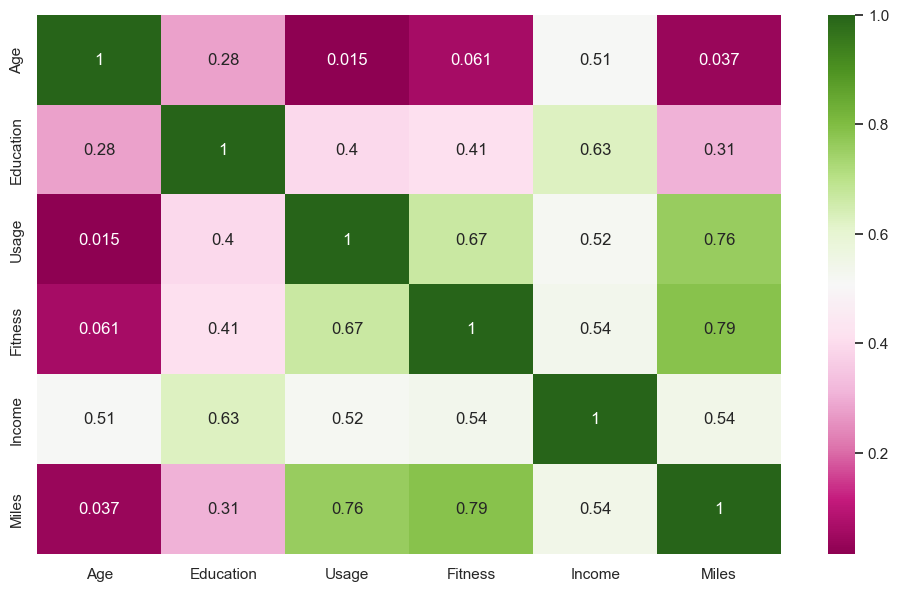

In [ ]:
correlation_matrix = data[["Age","Education","Usage","Fitness","Income","Miles"]].corr()

#heatmap
plt.figure(figsize=(12,7))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG')


#Observations
Here Pearson co-efficient is used to evalute the correlation between numerical data points. Pearson evalutes the linear relationship between data points.

Noting down the observations which are higher than 0.5.

1. Correlation between Age & Income is 0.51
2. Correlation between Education & Income is 0.63.
3. Correlation between Usage & Fitness is 0.67.
4. Correlation between Usage & Income is 0.52.
5. Correlation between Usage & Miles is 0.76.
6. Correlation between Fitness & Income is 0.54.
7. Correlation between Fitness & Miles is 0.79.
8. Correlation between Income & Miles is 0.54.

##Univariate Analysis

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,7

<Axes: xlabel='count', ylabel='Product'>

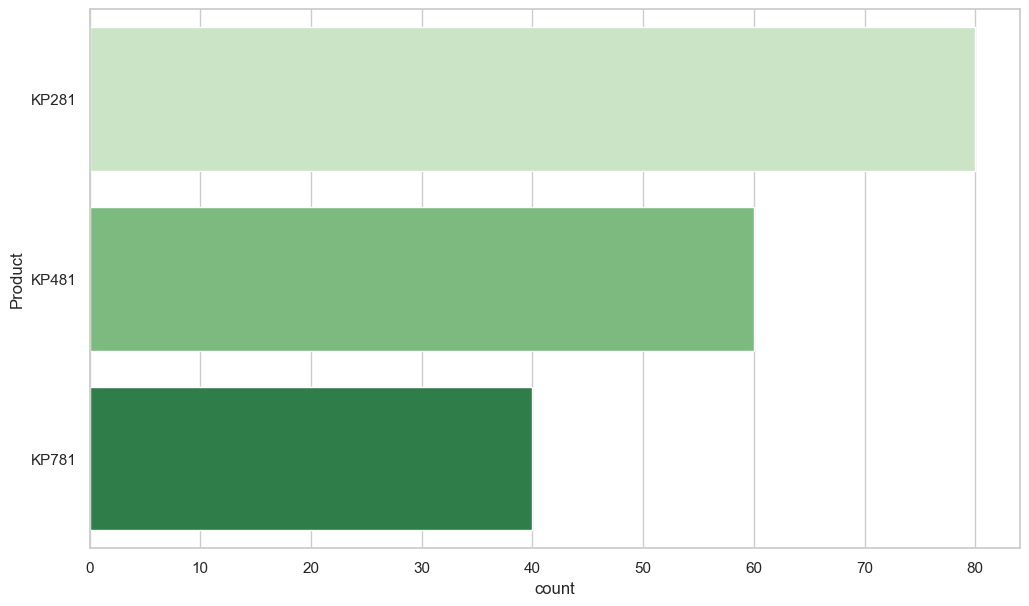

In [ ]:
#product
sns.countplot(data=data, y = "Product", palette = "Greens")


OBSERVATION
1. KP281 is the most purchased product having the count of 80.
2. KP481 is the second most purchased product having the count of 60.
3. KP781 is the purchased product having the count of 40.

<Axes: ylabel='Age'>

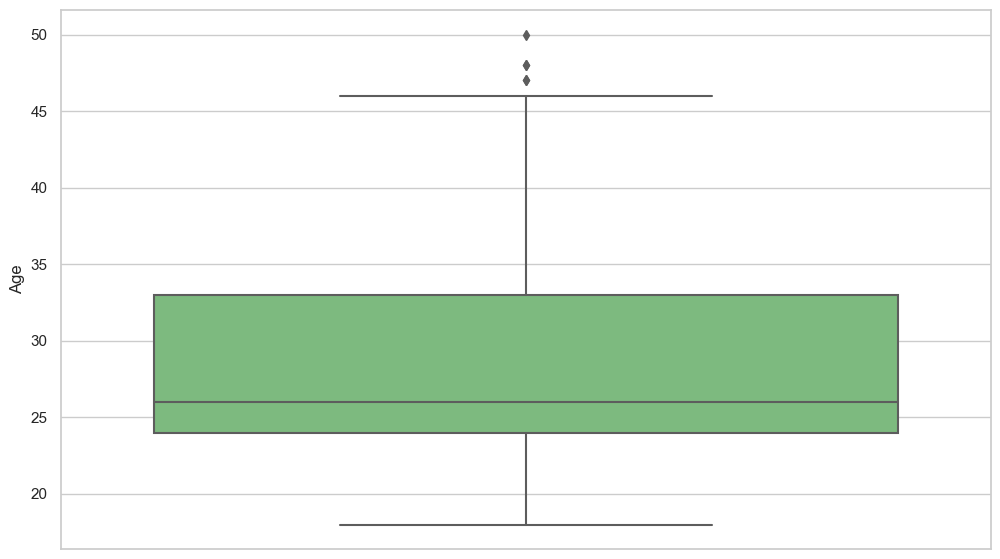

In [ ]:
#age
sns.boxplot(data=data, y = "Age", palette='Greens')

In [ ]:
#finding IQR
q3 = data["Age"].quantile(0.75)
q1 = data["Age"].quantile(0.25)
age_iqr = q3 - q1
print("Inter Quartile Range (IQR) of Age is", age_iqr)

Inter Quartile Range (IQR) of Age is 9.0


OBSERVATION
1. Most common age range is roughly between 22 - 32.
2. There are few data points whose age is more than 46 years (Outlier).
3. Difference between 25th and 75th percentile is 9 years.

<Axes: xlabel='Count', ylabel='Gender'>

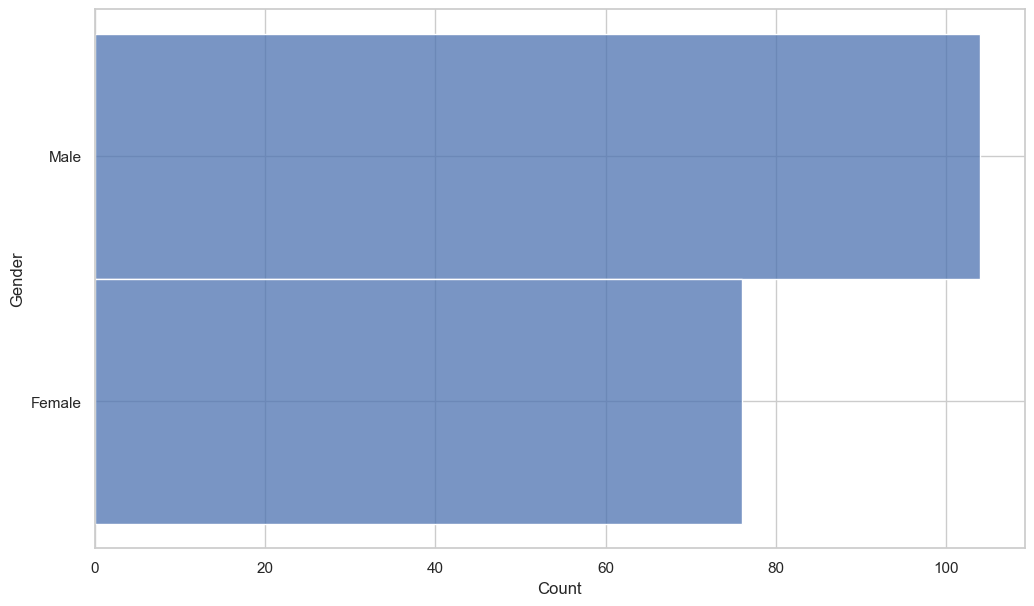

In [ ]:
#gender
sns.histplot(data=data, y="Gender")

OBSERVATION
1. Most common age range is roughly between 22 - 32.
2. There are few data points whose age is more than 46 years (Outlier).
3. Difference between 25th and 75th percentile is 9 years.

<Axes: ylabel='Education'>

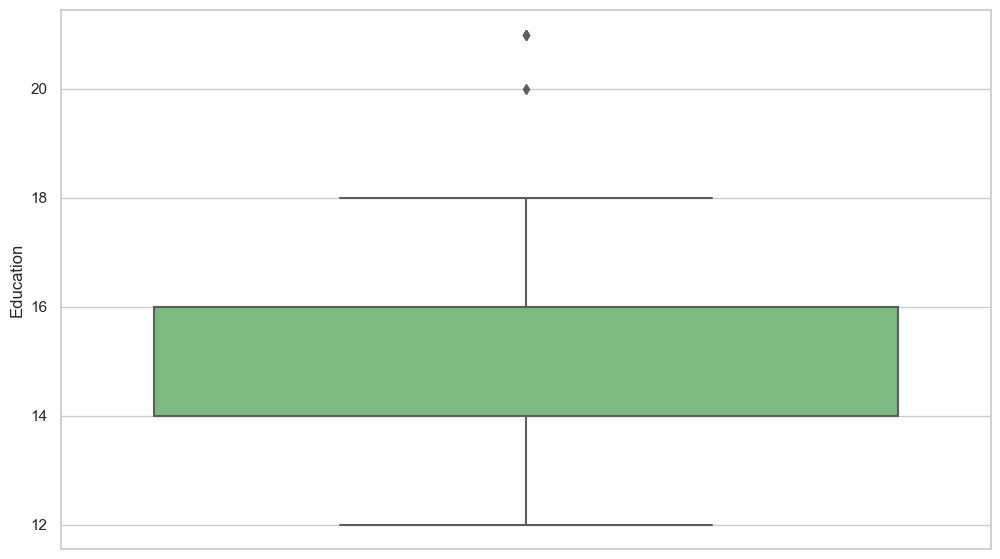

In [ ]:
#Education
sns.boxplot(data=data, y = "Education", palette='Greens')

In [ ]:
#finding age iqr
q3 = data["Education"].quantile(0.75)
q1 = data["Education"].quantile(0.25)
edu_iqr = q3 - q1
print("Inter Quartile Range (IQR) of Education is", edu_iqr)

Inter Quartile Range (IQR) of Education is 2.0


OBSERVATION
1. Majority of the people have education between 14-16 years.
2. There are only two people who have education more than 20 years (Outlier).
3. Difference between 25th and 75th percentile is 2 years.

<Axes: ylabel='Income'>

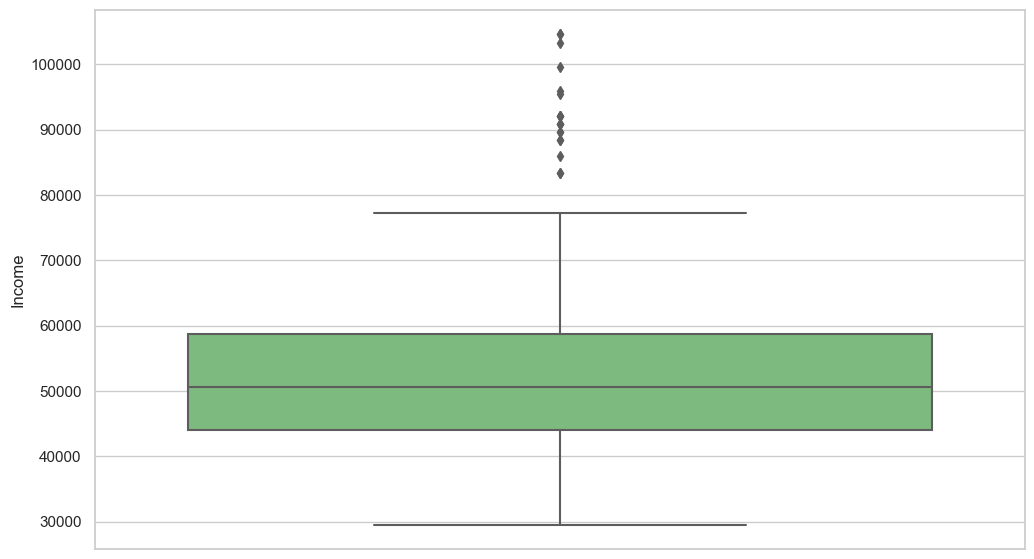

In [ ]:
# income
sns.boxplot(data=data, y = "Income", palette='Greens')

In [ ]:
#finding iqr
q3 = data["Income"].quantile(0.75)
q1 = data["Income"].quantile(0.25)
income_iqr = q3 - q1
print("Inter Quartile Range (IQR) of income is", income_iqr)

Inter Quartile Range (IQR) of income is 14609.25


In [ ]:
#checking for outliers
lower_fence = q1 - 1.5 * income_iqr
# Calculate the upper fence
upper_fence = q3 + 1.5 * income_iqr
# Identify outliers
outliers = data[(data['Income'] < lower_fence) | (data['Income'] > upper_fence)]
outliers

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
159,KP781,27,Male,16,Partnered,4,5,83416,160
160,KP781,27,Male,18,Single,4,3,88396,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
168,KP781,30,Male,18,Partnered,5,4,103336,160
169,KP781,30,Male,18,Partnered,5,5,99601,150
170,KP781,31,Male,16,Partnered,6,5,89641,260


OBSERVATION
1. Most of the customers have income between 45K-60K
2. Very few people have income more than roughly 85k-100k(mostly outliers)
3. Difference between 25th and 75th percentile is 14609$.

<Axes: xlabel='Miles'>

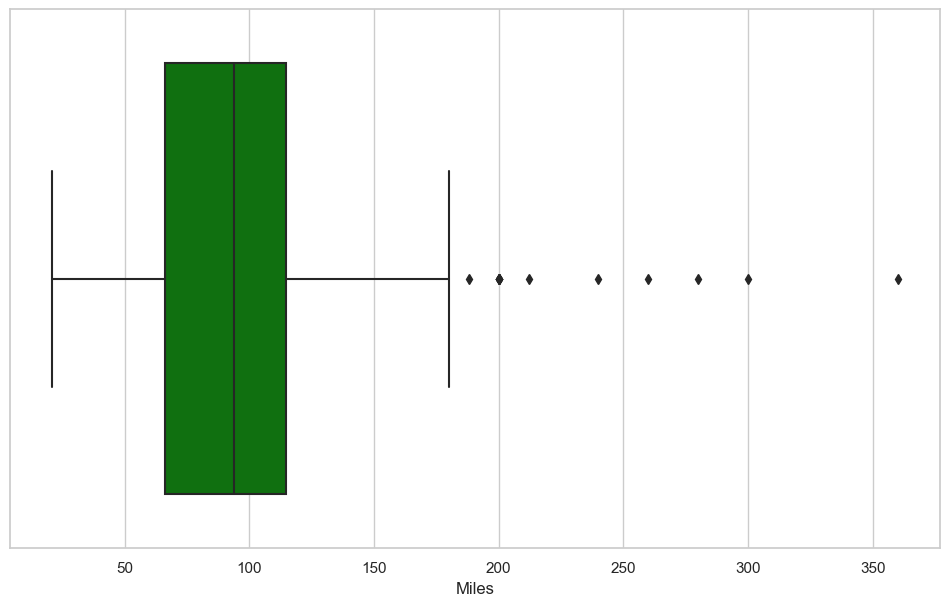

In [ ]:
#miles
sns.boxplot(data=data, x='Miles', color= "green")

In [ ]:
#finding iqr
q3 = data["Miles"].quantile(0.75)
q1 = data["Miles"].quantile(0.25)
miles_iqr = q3 - q1
print("Inter Quartile Range (IQR) of Miles is", miles_iqr)

Inter Quartile Range (IQR) of Miles is 48.75


In [ ]:
#checking for outliers
lower_fence = q1 - 1.5 * miles_iqr
# Calculate the upper fence
upper_fence = q3 + 1.5 * miles_iqr
# Identify outliers
outliers = data[(data['Miles'] < lower_fence) | (data['Miles'] > upper_fence)]
outliers

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
23,KP281,24,Female,16,Partnered,5,5,44343,188
84,KP481,21,Female,14,Partnered,5,4,34110,212
142,KP781,22,Male,18,Single,4,5,48556,200
148,KP781,24,Female,16,Single,5,5,52291,200
152,KP781,25,Female,18,Partnered,5,5,61006,200
155,KP781,25,Male,18,Partnered,6,5,75946,240
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200


OBSERVATION
1. Most of the distance travelled by the customer on the treadmill is roughly between 75-120 Miles.
2. Very few people have the travelled more than roughly 200 Miles (Outliers).
3. Difference between 25th and 75th percentile is 48.75 miles (running/walking).
4. Correlation between Miles & Fitness is fairly high (0.79).







##Bivariate Analysis

In [ ]:
#product
x=data.groupby("Product")

In [ ]:
#Average Income of customer buying each model
x['Income'].mean()

Product
KP281    46418.025
KP481    48973.650
KP781    75441.575
Name: Income, dtype: float64

In [ ]:
#Average Usage of customer buying each model
x['Usage'].mean()

Product
KP281    3.087500
KP481    3.066667
KP781    4.775000
Name: Usage, dtype: float64

In [ ]:
#Average Fitness of customer buying each model
x['Fitness'].mean()

Product
KP281    2.9625
KP481    2.9000
KP781    4.6250
Name: Fitness, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


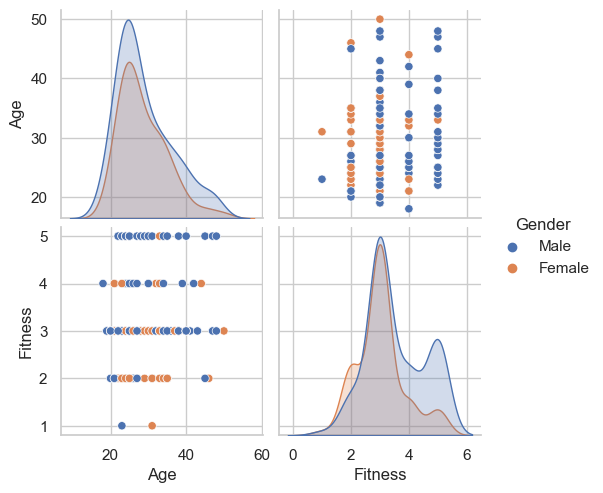

In [ ]:
#age, gender, fitness
sns.pairplot(data[["Age", "Gender", "Fitness"]], hue= "Gender" )

<Axes: xlabel='Product', ylabel='count'>

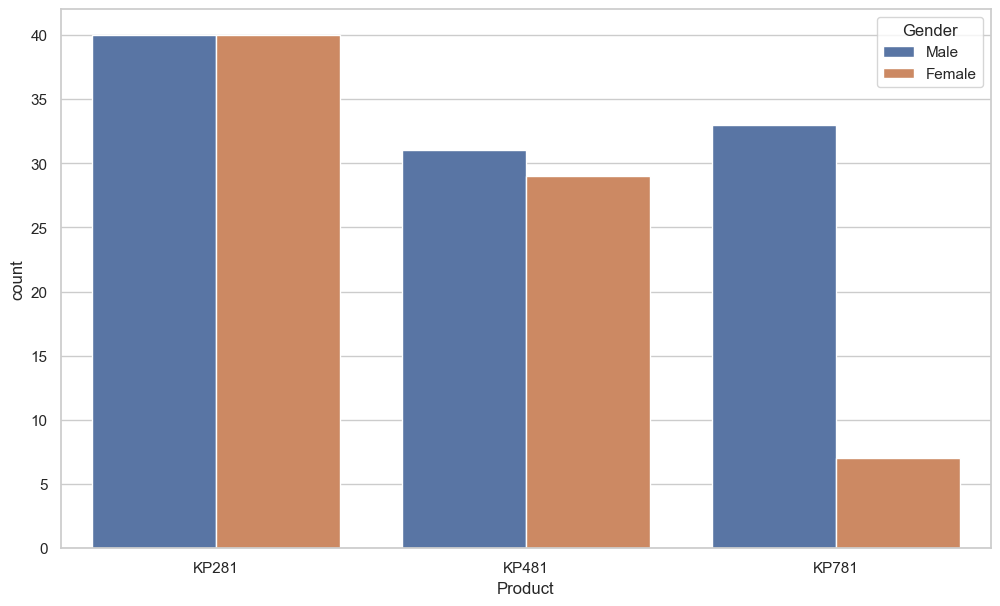

In [ ]:
# Gender & Product
sns.countplot(data=data, x='Product', hue='Gender')

OBSERVATION
1. Most common preference for both gender is KP281.
2. Ratio of Male/Female customers is huge in KP781.
3. Distribution of Male & Female is roughly same for KP481.
4. Males have bought more KP781 compare to KP481.

<Axes: xlabel='Usage', ylabel='Density'>

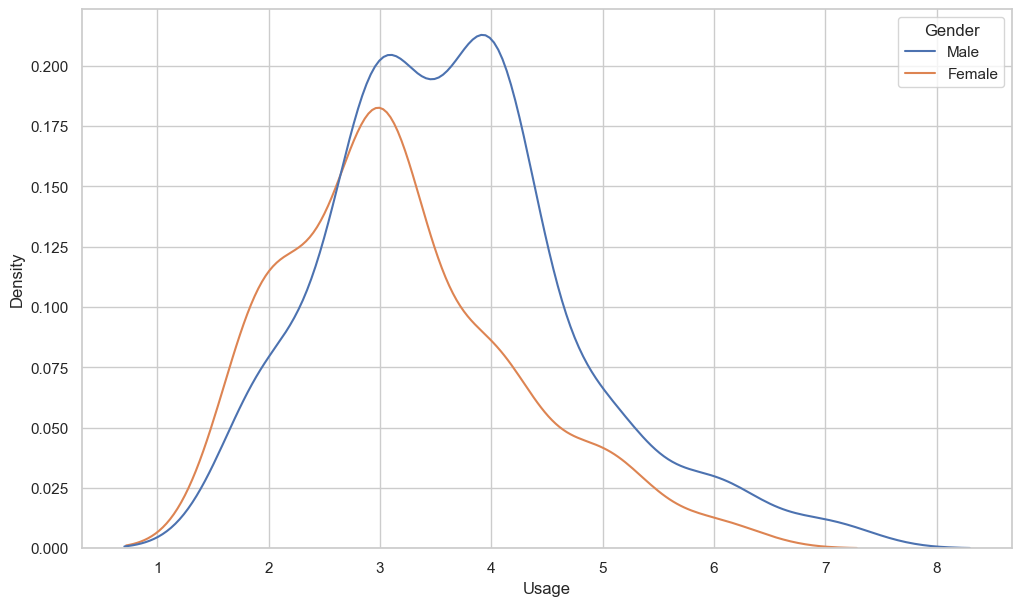

In [ ]:
# Gender &  usage
sns.kdeplot(data=data, x='Usage', hue='Gender')


OBSERVATION
1. Majority of males seems to use treadmill 4 times per week.
2. Followed by males using 3 times per week. Most of the women seems to use treadmills 3 times per week.
3. Very few males use treadmills 7 times per week, while no female seems to using 7 times per week.

<Axes: xlabel='Income', ylabel='Density'>

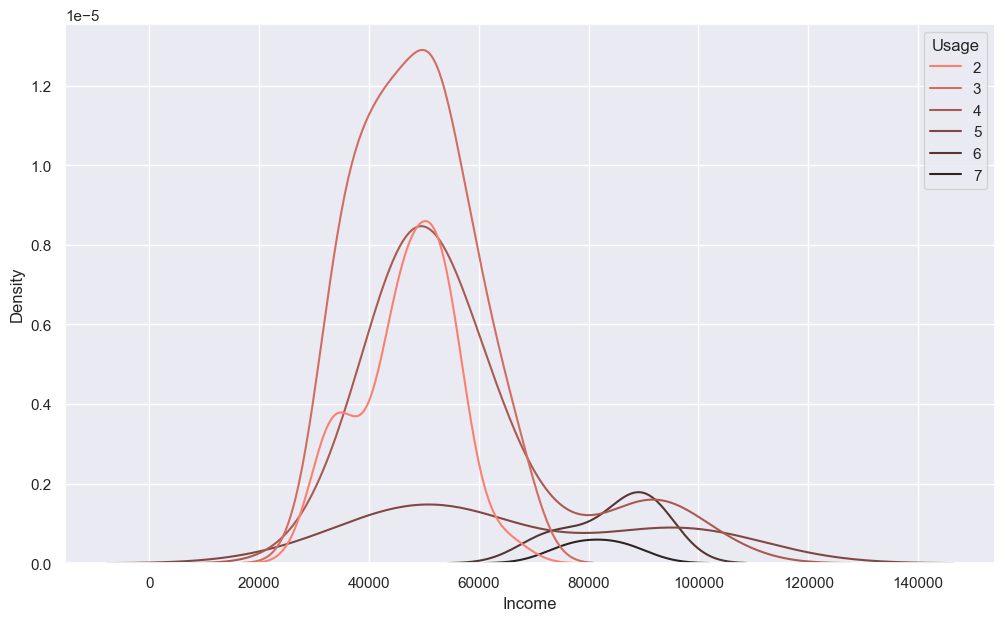

In [ ]:
# income and usage
sns.set_style('darkgrid')

sns.kdeplot(data=data, x='Income', hue='Usage', palette="dark:salmon_r")


<Axes: xlabel='Income', ylabel='Density'>

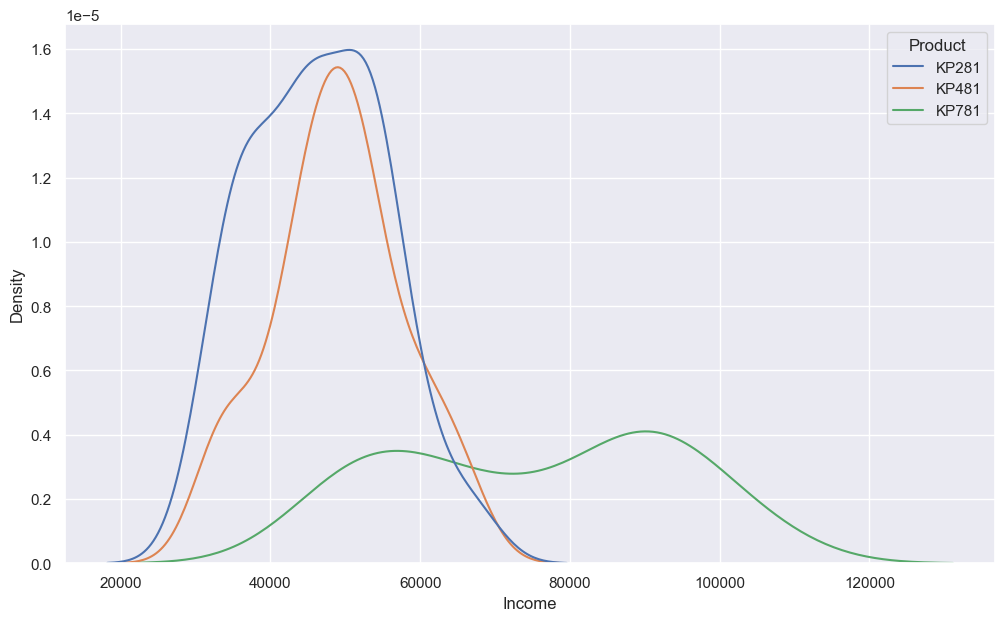

In [ ]:
# income, product
sns.kdeplot(data=data, x='Income', hue='Product')


<Axes: xlabel='Miles', ylabel='Density'>

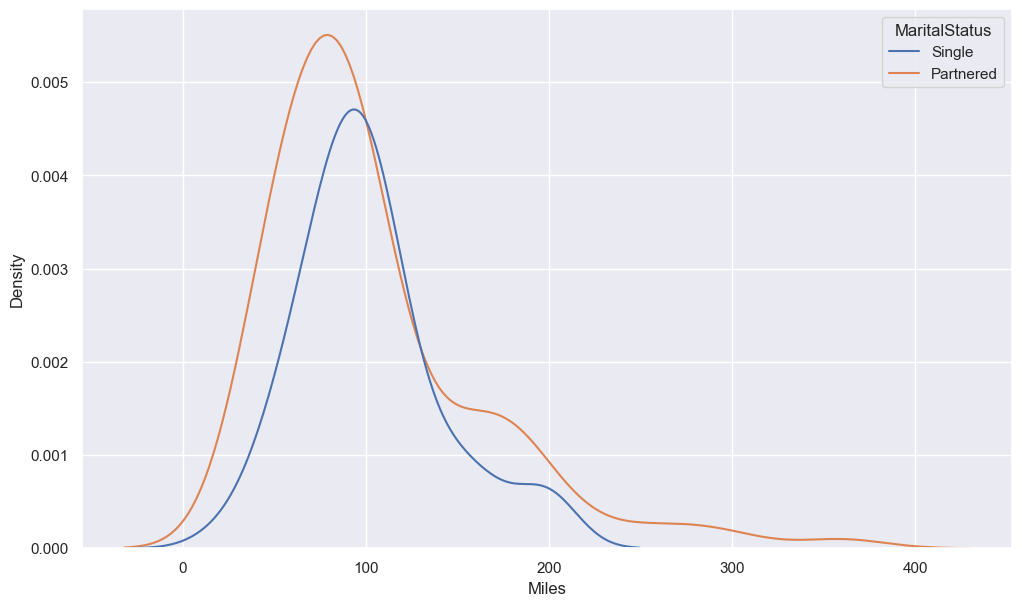

In [ ]:
# miles, marital status
sns.kdeplot(data=data, x='Miles', hue='MaritalStatus')

Observation
1. In general Partnered are less active than singles
2. But also Partnered have more miles than single --- comparing the maxes
3. Partnered status prefers to workout more on treadmills.
4. Distribution of Single & Partnered tends overlap at 100-150 miles.
4. Parterned tends to workout even after 200 miles, where 200 is the upper limit of singles

<Axes: xlabel='Miles', ylabel='Density'>

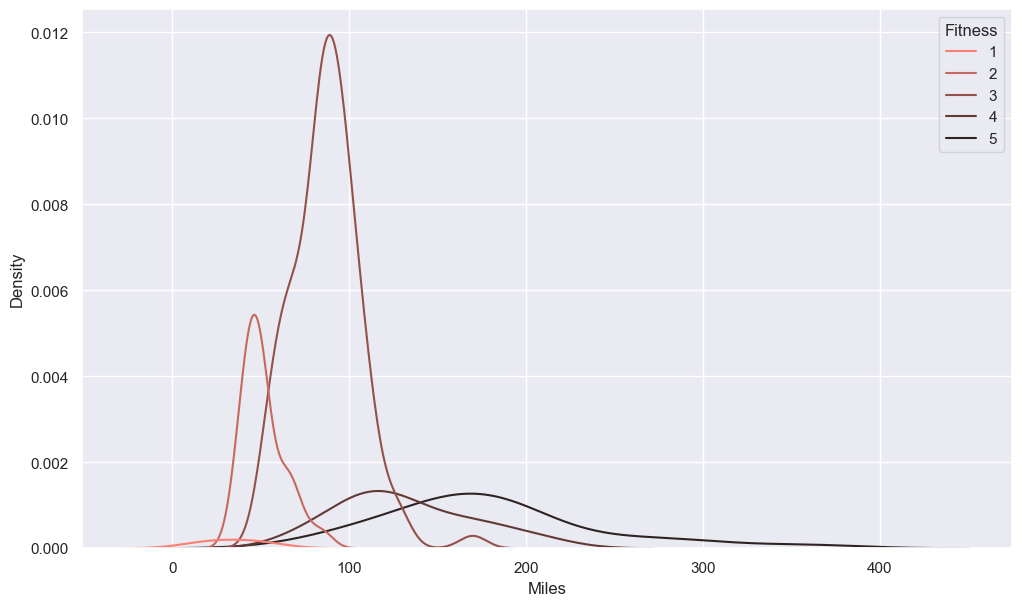

In [ ]:
# miles, fitness
sns.kdeplot(data=data, x='Miles', hue='Fitness', palette = "dark:salmon_r")

<Axes: xlabel='Miles', ylabel='Density'>

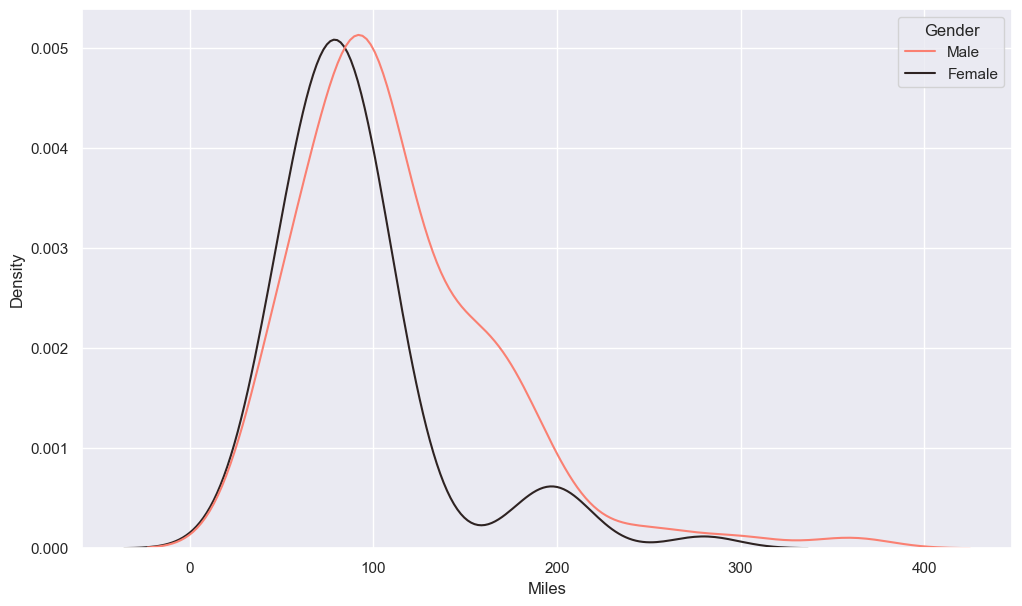

In [ ]:
# miles, gender
sns.kdeplot(data=data, x='Miles', hue='Gender', palette = "dark:salmon_r")

OBSERVATION
1. Both gender have peak miles roughly between 80-100 miles.
2. Very few males walk/run on treadmill for more than roughly 320 miles, while few females walk/run for 320 miles.
3. Distribution starts to deviate onwards 150 miles as the gap starts to increase and the gap stops at 200 miles.

<Axes: xlabel='Product', ylabel='count'>

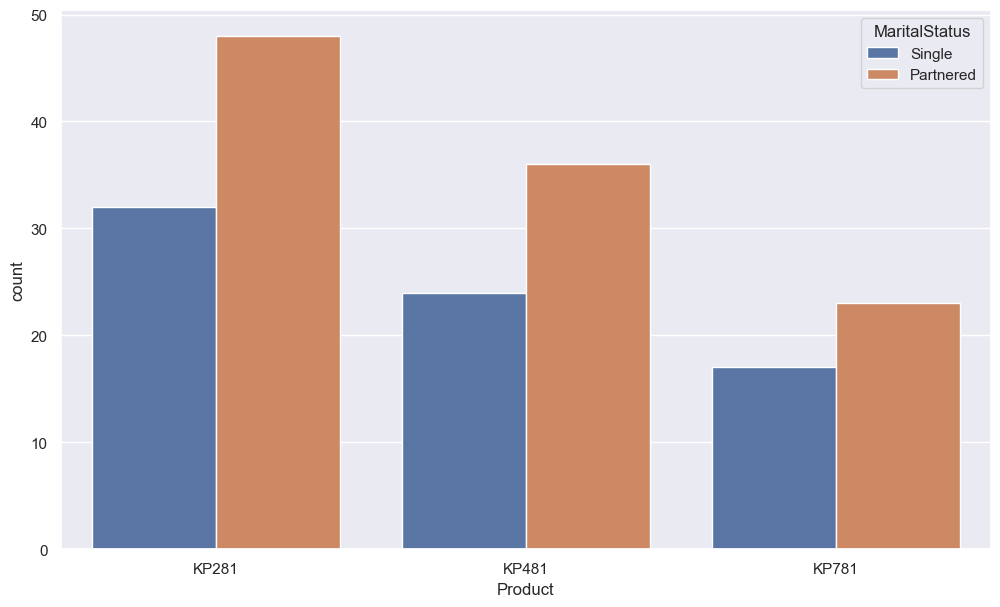

In [ ]:
# Preferred proof Couples and Singles
sns.countplot(data=data, x="Product", hue='MaritalStatus')

OBSERVATIONS
1. Most preferred product for married couples is KP281. It is also the preferred prdouct of Singles as well.
2. Followed by KP481 & KP781 respectively.
3. Maybe it's because KP281 is cheaper than KP481 and KP781.

<Axes: xlabel='Age', ylabel='Density'>

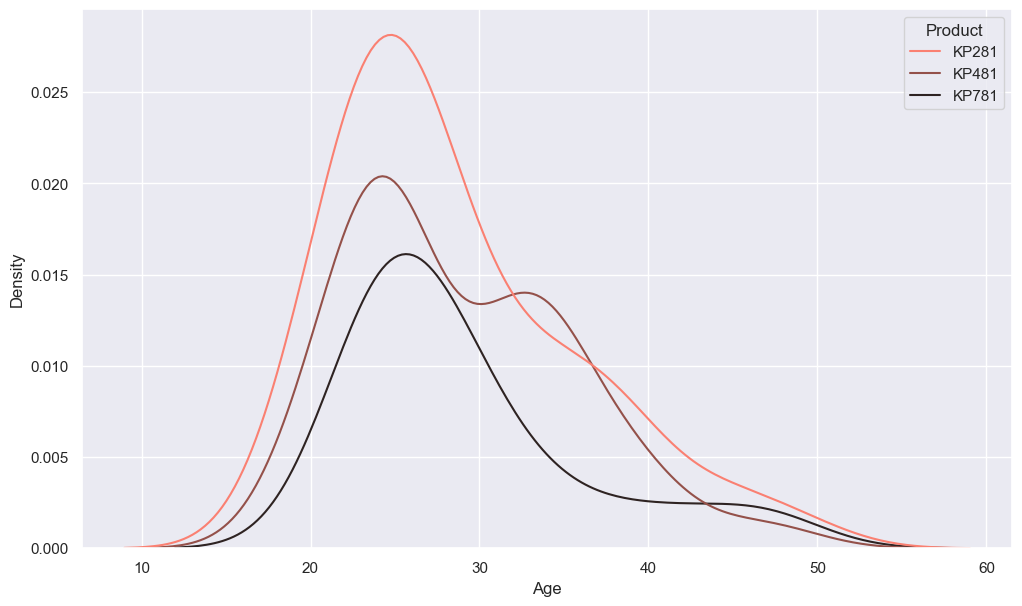

In [ ]:
# age, product
sns.kdeplot(data=data, x='Age', hue='Product', palette = "dark:salmon_r")

OBSERVATIONS
1. Age distribution in KP281 is maximum, followed by KP481, and KP781 respectively.
2. There is only one outlier in KP281, followed by one and five outliers in KP481 and KP781 respectively.
3. Buyer of KP281 is in the range of roughly 22 - 33 years.
4. Buyer of KP481 is in the range of roughly 24 - 34 years.
5. Buyer of KP781 is in the range of roughly 25 - 30 years.

<Axes: xlabel='Education', ylabel='Product'>

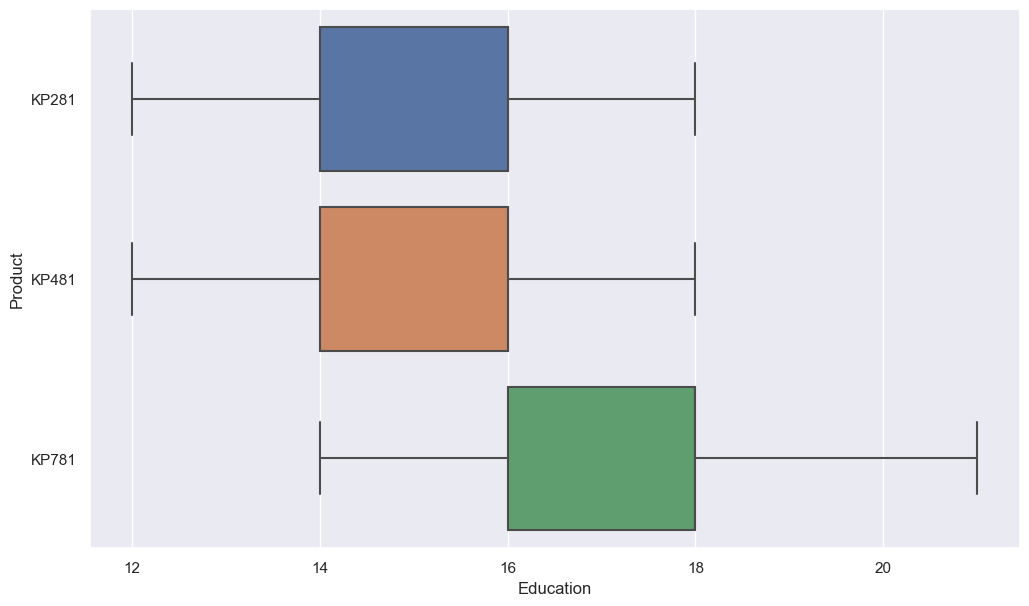

In [ ]:
# education and product
sns.boxplot(x=data['Education'],y=data['Product'])


OBSERVATION
1. Distributions of Education for all three models is same.
2. Range of distribution for KP281 and KP481 is exactly same i.e., 14 - 16 years.
3. Range of distribution for KP781 is between 16 - 18 years of education.
4. There is no outlier for all three models w.r.t Education.
5. People with more education years tend to buy KP781 as correlation between Education & Income is high (0.63).

<Axes: xlabel='Miles', ylabel='Product'>

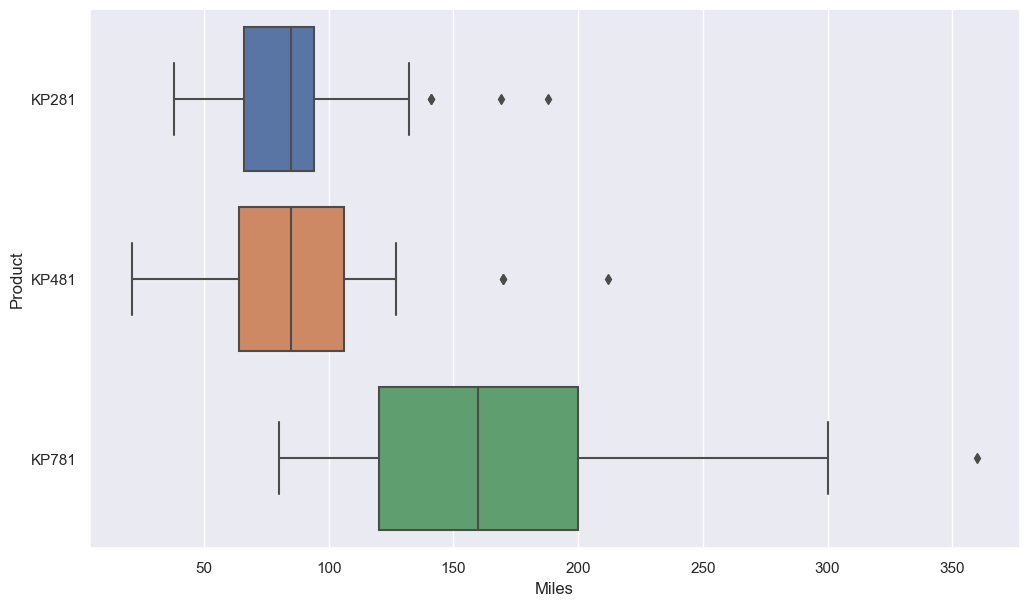

In [ ]:
#miles and product
sns.boxplot(x=data['Miles'],y=data['Product'])


OBSERVATION.
1. Distribution of Miles is maximum in KP781, followed by KP481 and KP281, respectively.
2. People tend to workout more on KP781, range is roughly between 125 Miles - 200 Miles.
3. Range of Miles on KP481 is roughly between 75 - 100 Miles.
4. Range of Miles on KP281 is roughly between 75 - 80 Miles.
5. There is only one outlier in KP781 w.r.t Miles, followed by two and three in KP481 and KP281 respectively.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


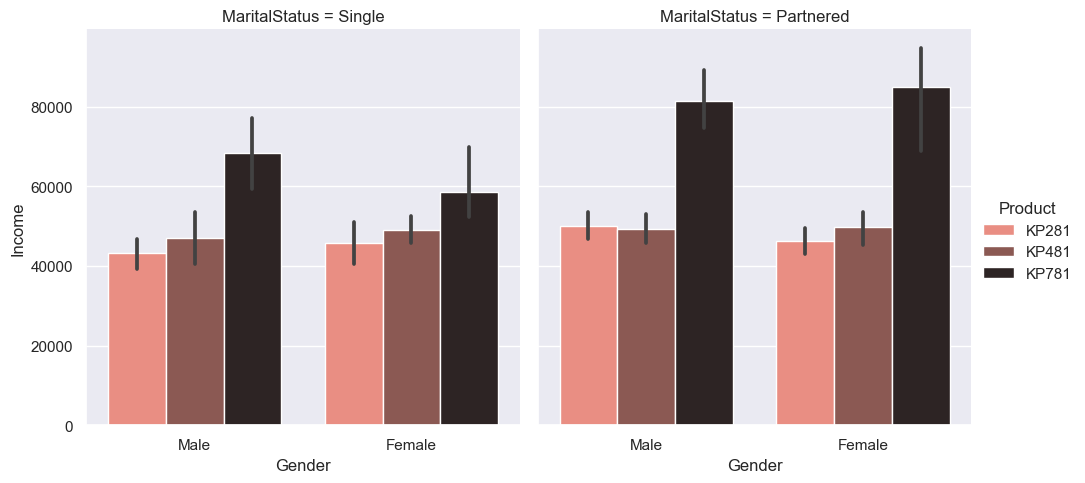

In [ ]:
# Income by gender by product and by marital status
sns.catplot(x='Gender',y='Income', hue='Product', col='MaritalStatus', data=data, kind='bar', palette='dark:salmon_r')
plt.show()

OBSERVATIONS
1. Partnered Female bought KP781 treadmill compared to Partnered Male.
2. Single Female customers bought KP281 treadmill slightly more compared to Single Male customers.
3. Partnered Male customers bought KP281 treadmill slightly more than Single Male customers.
4. There are more single Males buying treadmill than single Females.
5. Single Male customers bought KP781 treadmill compared to single Female.
6. Distribution of KP481 in Single & Parterned, Male & Female is same.
7. Partnered customers are more than Single customers.

## Probability calculations


In [ ]:
# creating crosstabs
x = pd.crosstab(data["Gender"], data["Product"], margins =True, margins_name ="Total")

Product,KP281,KP481,KP781,Total
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
Total,80,60,40,180


<Axes: xlabel='Product', ylabel='Gender'>

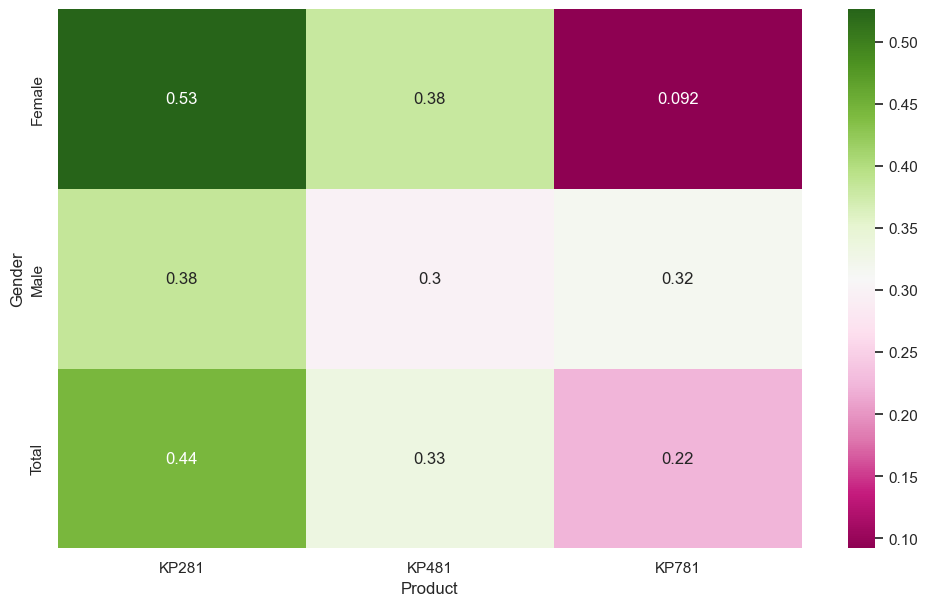

In [ ]:
#conditional probanility (Product/gender)
x = pd.crosstab(data["Gender"], data["Product"], normalize = "index",
                margins =True, margins_name ="Total") #to divide by gender as gender is index
sns.heatmap(x,annot=True, cmap='PiYG')

OBSERVATION conditional (product/gender)

1. Probability of buying KP281 given that the customer is male, P(Product=KP281 | Customer=Male) = 0.38.
2. Probability of buying KP481 given that the customer is male, P(Product=KP481 | Customer=Male) = 0.3.
3. Probability of buying KP781 given that the customer is male, P(Product=KP781 | Customer=Male) = 0.32.
4. Probability of buying KP281 given that the customer is female, P(Product=KP281 | Customer=Female) = 0.53.
5. Probability of buying KP481 given that the customer is female, P(Product=KP481 | Customer=Female) = 0.38.
6. Probability of buying KP781 given that the customer is female, P(Product=KP781 | Customer=Female) = 0.092.

MARGINAL PROBABILITY
1. Probability of buying KP281 P(Product=KP281 | Total) = 0.44
2. Probability of buying KP481 P(Product=KP481 | Total) = 0.33
3. Probability of buying KP781 P(Product=KP781 | Total) = 0.22

<Axes: xlabel='Product', ylabel='Gender'>

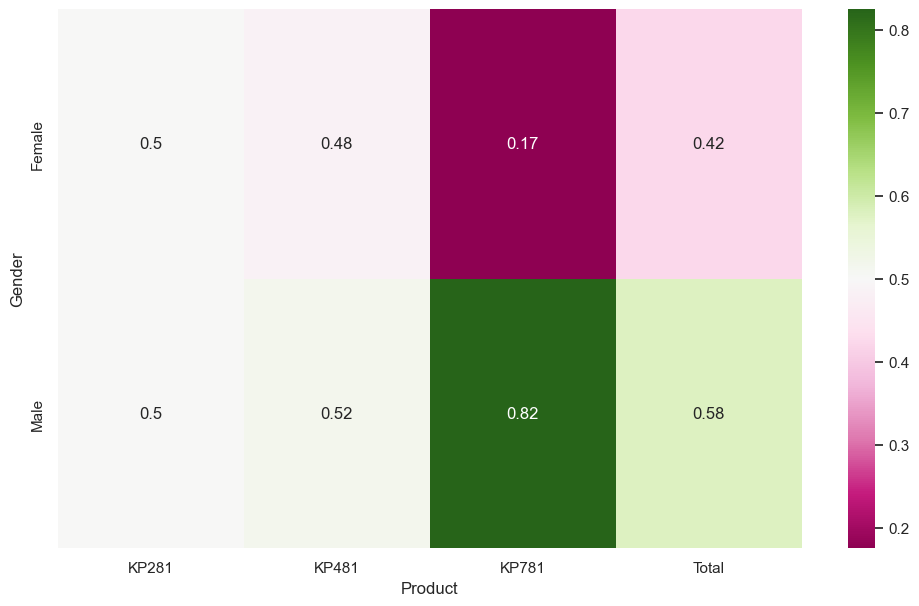

In [ ]:
#conditional probanility (Product/gender)
x = pd.crosstab(data["Gender"], data["Product"], normalize = "columns",
                margins =True, margins_name ="Total") #to divide by product as product is column

sns.heatmap(x,annot=True, cmap='PiYG')

OBSERVATION conditional (gender/product)
1. Probability that customer is Male given that he bought KP281, P(Customer=Male | Producty=KP281) = 0.50.
2. Probability that customer is Female given that she bought KP281, P(Customer=Female | Product=KP281) = 0.50.
3. Probability that customer is Male given that he bought KP481, P(Customer=Male | Product=KP481) = 0.52.
4. Probability that customer is Female given that she bought KP481, P(Customer=Female | Product=KP481) = 0.48.
5. Probability that customer is Male given that he bought KP781, P(Customer=Male | Product=781) = 0.82.
6. Probability that customer is Female given that he bought KP781, P(Customer=Female | Product=KP781) = 0.17

MARGINAL PROBABILITY
1. Probability that customer is female P(Customer=Female | total) = 0.42
2. Probability that customer is male P(Customer=male | total) = 0.58

<Axes: xlabel='Product', ylabel='Gender'>

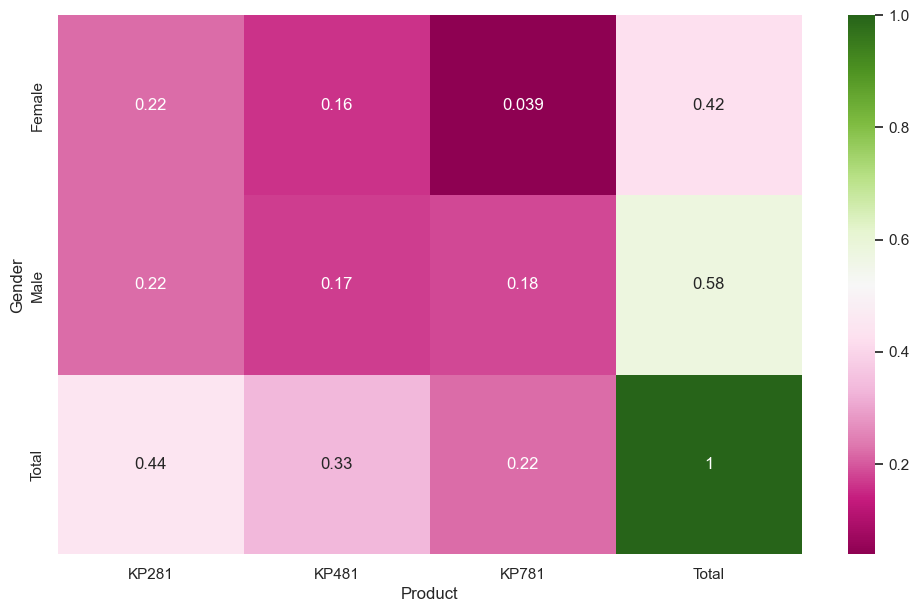

In [ ]:
# Joint probability
x = pd.crosstab(data["Gender"], data["Product"], normalize = True,
                margins =True, margins_name ="Total") #to divide by Total

sns.heatmap(x,annot=True, cmap='PiYG')

OBSERVATION JOINT PROBABILITY
1. Probability that customer buys KP281 and gender is Male, P(KP281 Intersection Male) = 0.22.
2. Probability that customer buys KP481 and gender is Male, P(KP481 Intersection Male) = 0.17.
3. Probability that customer buys KP781 and gender is Male, P(KP781 Intersection Male) = 0.18.
4. Probability that customer buys KP281 and gender is Female, P(KP281 Intersection Female) = 0.22.
5. Probability that customer buys KP481 and gender is Female, P(KP481 Intersection Female) = 0.16.
6. Probability that customer buys KP781 and gender is Female, P(KP781 Intersection Female) = 0.039.

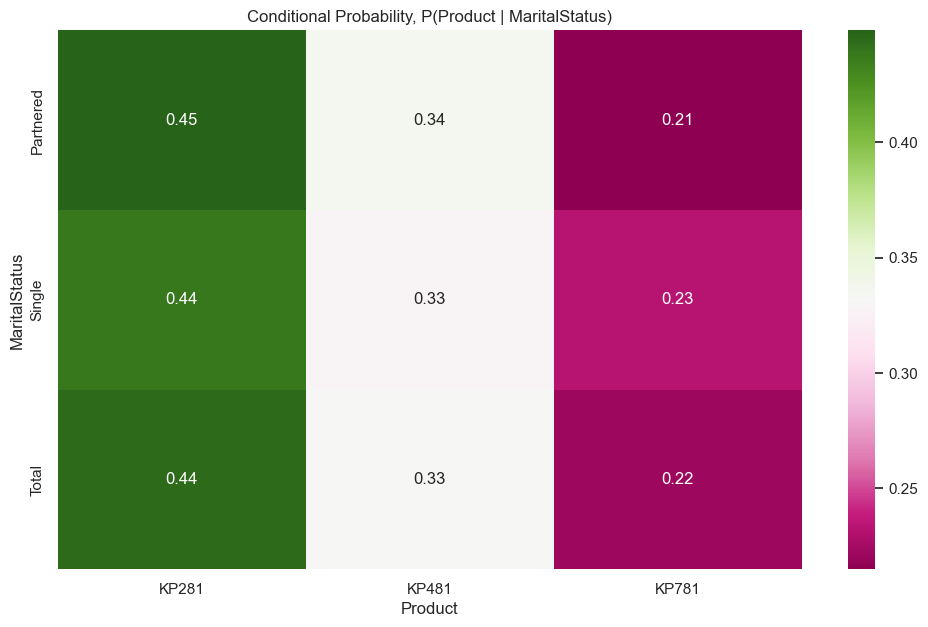

In [ ]:
# Conditional Probability, P(Product | MaritalStatus)
x = pd.crosstab(data["MaritalStatus"], data["Product"], normalize="index",
                margins=True, margins_name="Total")

sns.heatmap(x, annot=True, cmap='PiYG')

plt.title('Conditional Probability, P(Product | MaritalStatus)')
plt.show()

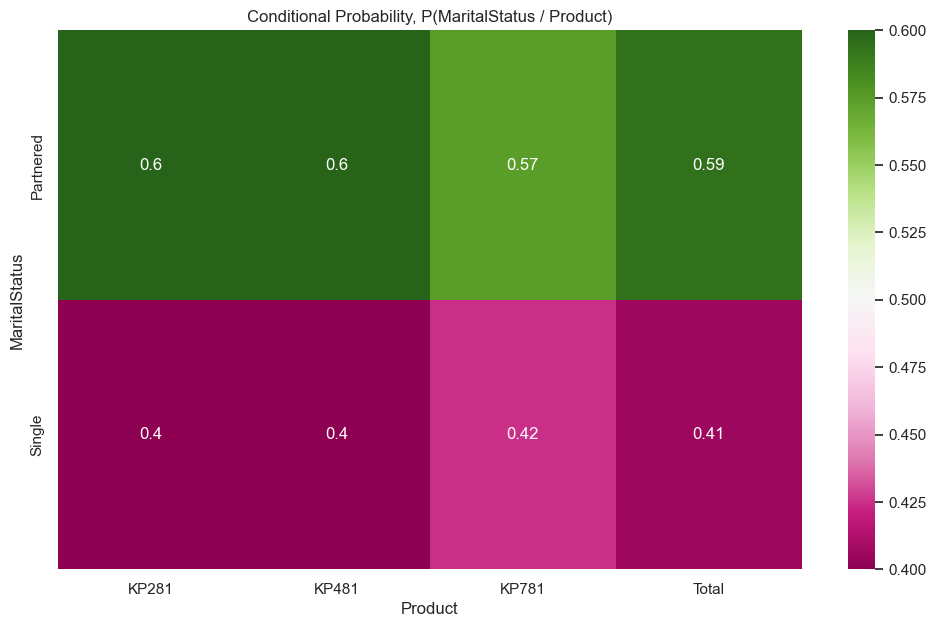

In [ ]:
# Conditional Probability, P(MaritalStatus / Product)
x = pd.crosstab(data["MaritalStatus"], data["Product"], normalize="columns",
                margins=True, margins_name="Total")

sns.heatmap(x, annot=True, cmap='PiYG')

plt.title('Conditional Probability, P(MaritalStatus / Product)')
plt.show()

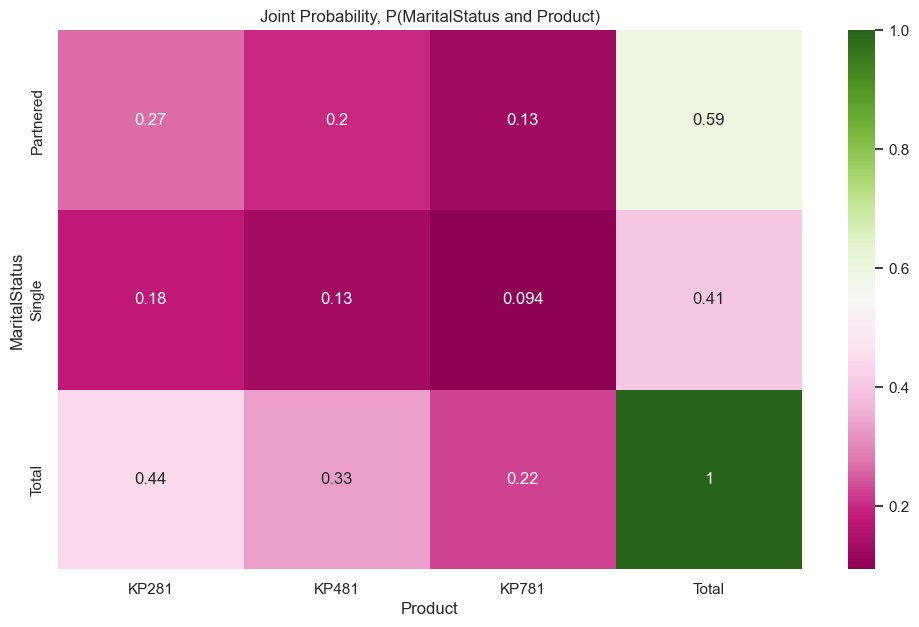

In [ ]:
# joint Probability, P(MaritalStatus / Product)
x = pd.crosstab(data["MaritalStatus"], data["Product"], normalize=True,
                margins=True, margins_name="Total")

sns.heatmap(x, annot=True, cmap='PiYG')

plt.title('Joint Probability, P(MaritalStatus and Product)')
plt.show()

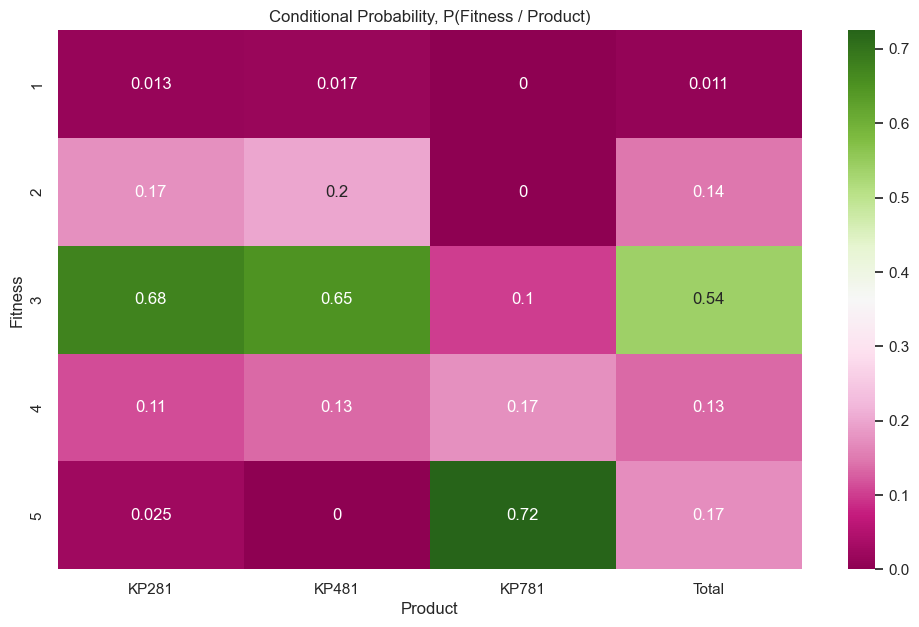

In [ ]:
# Conditional Probability, P(Fitness / Product)
x = pd.crosstab(data["Fitness"], data["Product"], normalize="columns",
                margins=True, margins_name="Total")

sns.heatmap(x, annot=True, cmap='PiYG')

plt.title('Conditional Probability, P(Fitness / Product)')
plt.show()

OBSERVATIONS
1. Probability of customer fitness rating is 5 given that they purchased KP481, P(Fitness=5 | Product=KP481) = 0.0 (impossible event).
2. Probability of customer fitness rating is 1  given that they purchased KP781, P(Fitness=5 | Product=KP781) = 0.0 (impossible event).
3. Probability of customer fitness rating is 2 given that they purchased KP781, P(Fitness=5 | Product=KP781) = 0.0 (impossible event).

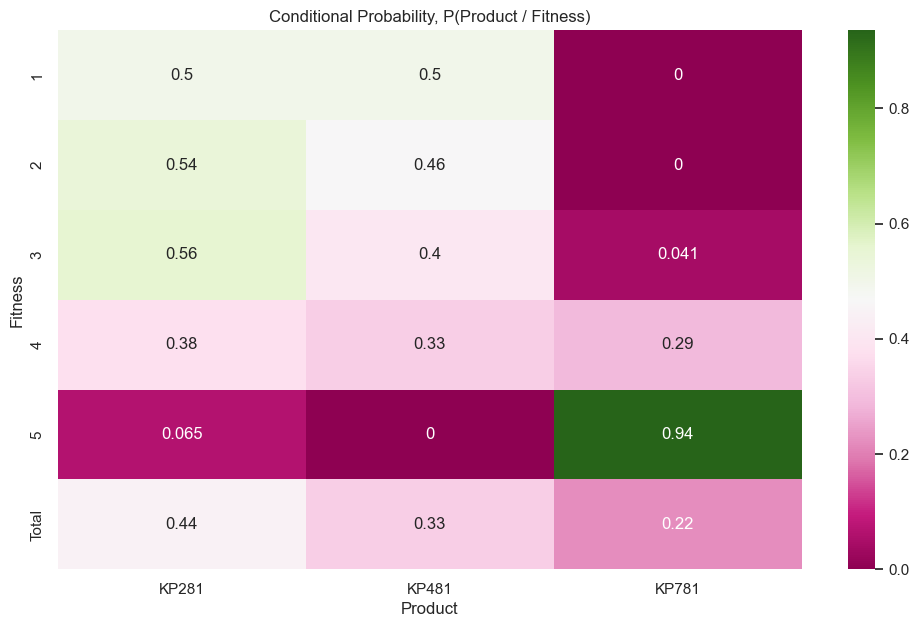

In [ ]:
# Conditional Probability, P(Product / Fitness)
x = pd.crosstab(data["Fitness"], data["Product"], normalize="index",
                margins=True, margins_name="Total")

sns.heatmap(x, annot=True, cmap='PiYG')

plt.title('Conditional Probability, P(Product / Fitness)')
plt.show()

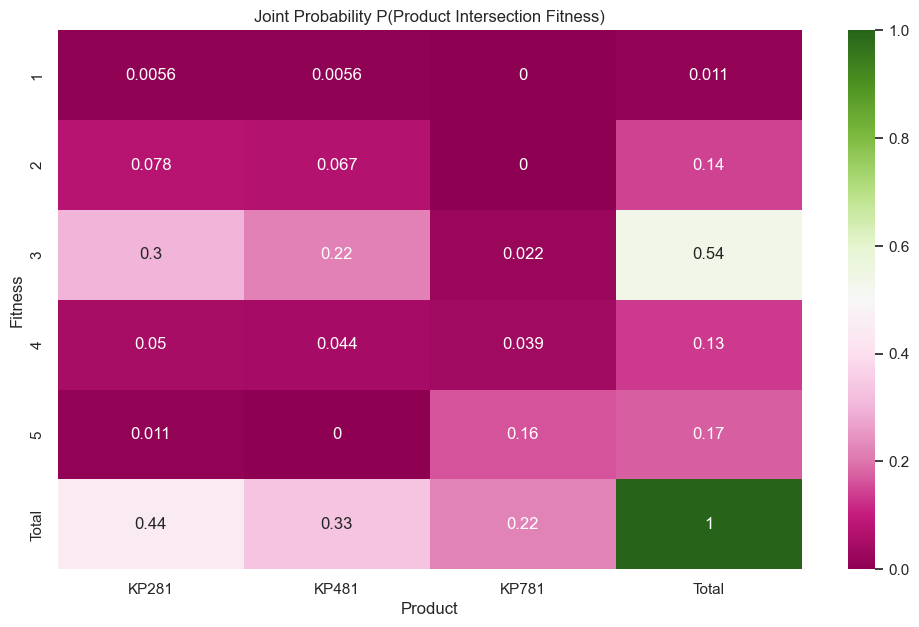

In [ ]:
# Joint Probability P(Product Intersection Fitness)
x = pd.crosstab(data["Fitness"], data["Product"], normalize=True,
                margins=True, margins_name="Total")

sns.heatmap(x, annot=True, cmap='PiYG')

plt.title('Joint Probability P(Product Intersection Fitness)')
plt.show()

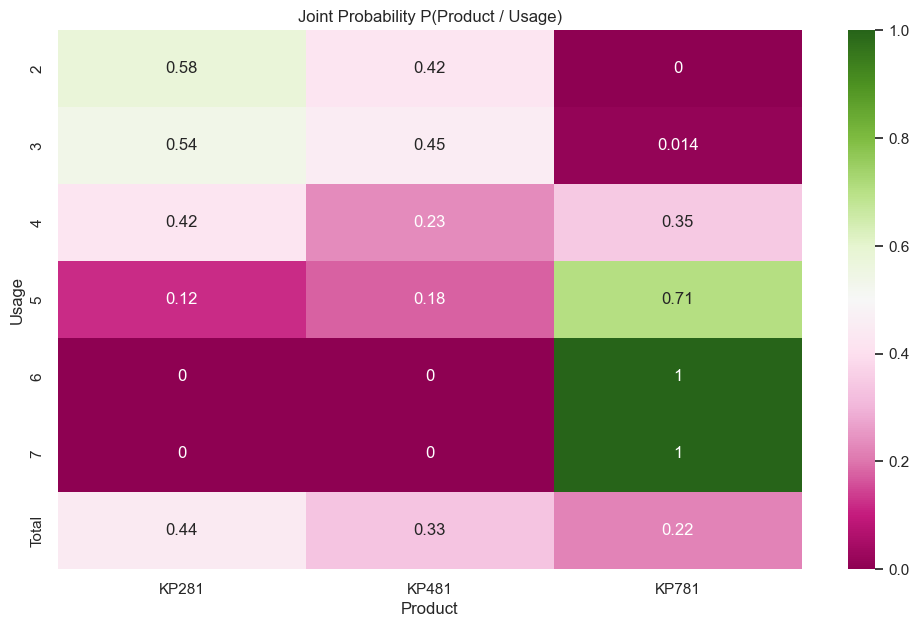

In [ ]:
# Conditional Probability P(Product / usage)
x = pd.crosstab(data["Usage"], data["Product"], normalize = "index",
                margins=True, margins_name="Total")

sns.heatmap(x, annot=True, cmap='PiYG')

plt.title('Joint Probability P(Product / Usage)')
plt.show()

OBSERVATIONS
1. Probability of customer buying product KP781 having their usage 6 times per week is = 1
2. Probability of customer buying product KP781 having their usage 7 times per week is= 1
Means-
if customer usage of a product 7 time a week then he will buy KP781-- most expensive.

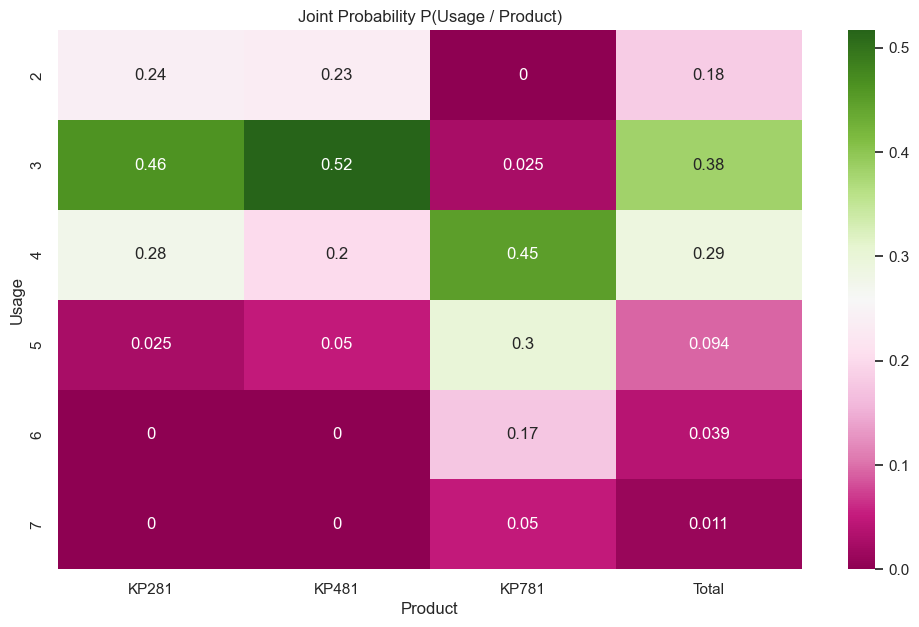

In [ ]:
# Conditional Probability P(Usage / Product)
x = pd.crosstab(data["Usage"], data["Product"], normalize = "columns",
                margins=True, margins_name="Total")

sns.heatmap(x, annot=True, cmap='PiYG')

plt.title('Joint Probability P(Usage / Product)')
plt.show()

OBSERVATIONS
1. Probability of customer using product 7 times per week buying product KP781 having their is= 0.05
Means
if the customer is buying KP281 an d KP481 then the product will never be used 7 times a week.


# Inferences

1. The KP281 model is the top-selling item, followed by the KP481 and KP781 models, respectively.
2. The data shows a higher number of Male buyers compared to Female buyers.
3. here are more buyers who are in a Partnership compared to those who are Single.
4. The average age of customers is 28 years, with a maximum of 50 years, a minimum of 18 years, and a median of 26 years.
5. The average years of education for customers is 15.5, with a maximum of 21 years, a minimum of 2 years, and a median of 16 years.
6. The average planned treadmill usage is 3 times per week, with a maximum of 7 times per week, a minimum of 2 times per week, and a median of 3 times per week.
7. The average self-rated fitness level of users is 3, with a maximum rating of 5, a minimum of 1, and a median rating of 3.
8. The average annual income of customers is $53.7K, with a maximum of $104K, a minimum of $29.5K, and a median income of $50.5K.
9. The average distance traveled by customers, either by walking or running, is 103 miles, with a maximum of 360 miles, a minimum of 21 miles, and a median of 94 miles.
10. There is a moderately strong relationship between education and income levels.
11. There is a strong relationship between fitness level and distance traveled on the treadmill.
12. There is a strong relationship between usage and distance traveled on the treadmill.
13. The age difference between the 25th and 75th percentiles is only 9 years.
14. The difference in years of education between the 25th and 75th percentiles is only 2 years.
15. Most customers use the treadmill 3-4 times per week, while very few people walk/run 6-7 times per week.
16. The vast majority of people have rated themselves as moderately fit.
17. The mean income of KP281 buyers is $46.4K, while KP481 buyers have an income of $48.9K, and KP781 buyers have an income of $75.4K.
18. The mean usage of KP281 and KP481 is the same at 3, while KP781 has a mean usage of 4.
19. The mean fitness rating of customers buying KP281 and KP481 is 3, while the KP781 fitness rating is 4.6.
20. The KP781 is the most preferred treadmill among males, while the female gender prefers it the least.
21. Overall, males tend to use treadmills more frequently.
22. The income distribution of both genders is roughly the same.
23. Males tend to have a higher fitness level compared to females.
24. The distance traveled by both genders is roughly the same, while men have gone beyond 320 miles.
25. Individuals in a Partnership tend to have a higher fitness level compared to Singles.

# Profiling

##KP281

- The KP281 model is the top-selling treadmill, accounting for 44.44% of sales.
- The average income of customers who purchased the KP281 is 46.4K.
- The average planned usage by customers is 3 times per week.
- The mean fitness rating of customers, when rounded, is 3.
- Both male and female buyers prefer the KP281 model as their primary choice of treadmill.
- The age range of KP281 buyers is approximately between 22 and 33 years old.
- The income range of KP281 buyers is roughly between 39K and 53K.
- The education range of KP281 buyers is between 14 and 16 years.
- The distance traveled on the treadmill by KP281 buyers is approximately between 75 and 80 miles.
- The median and mean fitness rating for KP281 buyers is 3.
- Single female customers purchased the KP281 treadmill slightly more than single male customers, while partnered male customers bought the KP281 slightly more than single male customers.
- The probability of purchasing the KP281 given that the customer is male is 0.38.
- The probability of purchasing the KP281 given that the customer is female is 0.53.
- The probability of a customer purchasing the KP281 and being male is 0.22.
- The probability of a customer purchasing the KP281 and being female is 0.22.
- The probability of a customer purchasing the KP281 and having a single marital status is 0.18.
- The probability of a customer purchasing the KP281 and being in a partnership is 0.27.
- The probability of a customer purchasing the KP281 given a fitness rating of 3 is 0.56.
- The probability of a customer having a fitness rating of 3, given that they purchased the KP281, is 0.68.
- The probability of a customer purchasing the KP281 and having a fitness rating of 3 is 0.3.


##KP481

- The KP481 model is the second most popular product sold, contributing 33.33% of sales.
- The average income of KP481 buyers is 49K.
- The typical planned usage for KP481 customers is three times per week.
- The mean fitness rating of KP481 buyers is 3.
- There are slightly more male buyers of the KP481 model compared to females.
- Couples tend to buy the KP481 more often than single customers.
- The age range of KP481 treadmill customers is roughly between 24-34 years old.
- The income range of KP481 treadmill customers is approximately 45K - 53K.
- The education range of KP481 buyers is the same as KP281, which is 14 - 16 years.
- The distance traveled on the KP481 treadmill is around 75 - 100 miles, making it the second-highest distance traveled model.
- The fitness mean/median of KP481 customers is the same as KP281, which is 3.
- The breakdown of KP481 buyers across single/partnered and male/female statuses is relatively even.

##KP781
- The KP781 is a rarely purchased treadmill model due to its high cost.
- The mean income of KP781 buyers is 75.4K.
- The typical planned usage for KP781 customers is 4 times per week.
- The average fitness rating of KP781 buyers is 4.
- The KP781 is the most preferred model among males, while very few females purchase it.
- The KP781 is not very popular among singles or those in a partnership.
- The age range of KP781 buyers is roughly between 25-30 years old, likely due to their higher incomes.
- The income range of KP781 buyers is approximately 59K - 92K, which is a wider range compared to KP281 & KP481 buyers.
- The education range for KP781 buyers is 16 - 18 years, indicating a high correlation between education and income for these customers.
- The fitness range for KP781 buyers is typically between 4 - 5, as more feature-rich treadmills appeal to those already fit.
- Partnered females purchased the KP781 more often than partnered males.
- Single male customers bought more KP781 treadmills compared to single females.


#RECOMMENDATIONS
- The KP281 and KP481 treadmill models are preferred by customers with an annual income range of $39K - $53K. These models should be promoted as budget-friendly options.
- Since the KP781 offers more advanced features and functionalities, it should be marketed towards professional athletes and fitness enthusiasts.
- To increase visibility, we should consider endorsing the KP781 with recent Olympic or sports event winners, such as Neeraj Chopra.
- Running marketing campaigns on occasions like Women's Day and Mother's Day could encourage more women to prioritize exercise and fitness.
- We should explore strategies to expand our customer base beyond the age of 50. Basic treadmill models like the KP281 or KP481 could be recommended as starter options for this demographic.
- As customers become more experienced and their usage increases over time, we can suggest upgrading to higher-end treadmill models, potentially generating additional revenue.
